# Playing with Health Data
Colin Jemmott<br>
June 26, 2016


In [1]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
from sklearn import linear_model, datasets, metrics, tree
from sklearn.cross_validation import train_test_split
% matplotlib inline

## Loading the data

In [2]:
# Load the base csv and take a quick look
base_df = pd.read_csv('meps_base_data.csv')
base_df = base_df.drop('Unnamed: 0', 1) # drop the index field
base_df.head(20)

,id,panel,pooledWeight,age,sex,race,married,highBPDiagnosed,diabetesDiagnosed,chdDiagnosed,miDiagnosed,anginaDiagnosed,strokeDiagnosed,emphysemaDiagnosed,asthmaDiagnosed,otherHDDiagnosed,heartFailureDiagnosed
0,10007101,15,3603.881236,28,Male,White,MARRIED,Yes,No,No,No,No,No,No,No,No,No
1,10007102,15,2544.550424,25,Female,White,MARRIED,No,No,No,No,No,No,No,Yes,No,No
2,10007103,15,4050.397468,4,Male,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
3,10007104,15,3064.059720,3,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
4,10008101,15,3635.552466,51,Male,Multiple,MARRIED,No,No,No,No,No,No,No,No,No,No
5,10008102,15,4367.816253,53,Female,Asian,MARRIED,No,No,No,No,No,No,No,No,No,No
6,10008103,15,3342.316504,12,Female,Asian,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable,No,Inapplicable,No
7,10009101,15,6241.938280,61,Female,Black,NEVER MARRIED,Yes,No,No,No,No,No,No,No,No,No
8,10012101,15,9143.332918,79,Male,White,MARRIED,Yes,No,No,No,No,Yes,Yes,No,No,No
9,10012102,15,10168.118988,75,Female,White,MARRIED,Yes,No,No,Yes,No,No,No,No,No,No


In [3]:
# Check if id is unique
len(base_df['id']) == len(base_df['id'].unique())

True

In [4]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61489 entries, 0 to 61488
Data columns (total 17 columns):
id                       61489 non-null int64
panel                    61489 non-null int64
pooledWeight             61489 non-null float64
age                      61489 non-null int64
sex                      61489 non-null object
race                     61489 non-null object
married                  61489 non-null object
highBPDiagnosed          61489 non-null object
diabetesDiagnosed        61489 non-null object
chdDiagnosed             61489 non-null object
miDiagnosed              61489 non-null object
anginaDiagnosed          61489 non-null object
strokeDiagnosed          61489 non-null object
emphysemaDiagnosed       61489 non-null object
asthmaDiagnosed          61489 non-null object
otherHDDiagnosed         61489 non-null object
heartFailureDiagnosed    61489 non-null object
dtypes: float64(1), int64(3), object(13)
memory usage: 8.0+ MB


In [5]:
# Load the medication csv and take a quick look
meds_df = pd.read_csv('meps_meds.csv')
meds_df = meds_df.drop('Unnamed: 0', 1)
meds_df.head(20)

,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
0,10007104,3,2011,AMOXICILLIN,143988775,75.0,SUSR
1,10007104,3,2011,OTIC EDGE SOLUTION,68032032814,14.0,SOL
2,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.0,SPR
3,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.0,SPR
4,10008102,9,2011,DIPHENHYDRAM,603333921,30.0,CAP
5,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD
6,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD
7,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD
8,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD
9,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD


Looks like there are a bunch of rows that are duplicates.  Let's clean that up a little.  If I had more time I would explore the data at this stage to understand in what other ways it isn't clean.<br>
One assumption here is that rxName is the only field that matters - changes in quantity and form are ignored.

In [6]:
print('Medication CSV length: ' + str(meds_df.size))
meds_df = meds_df.drop_duplicates(subset = ['id','rxName'])
print('With duplicates removed: ' + str(meds_df.size))
meds_df.head(20)

Medication CSV length: 8038429
With duplicates removed: 1698473


,id,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
0,10007104,3,2011,AMOXICILLIN,143988775,75.0,SUSR
1,10007104,3,2011,OTIC EDGE SOLUTION,68032032814,14.0,SOL
2,10008102,3,2011,NASAL DECONGESTANT 0.05% SPRAY,63981056903,15.0,SPR
4,10008102,9,2011,DIPHENHYDRAM,603333921,30.0,CAP
5,10008102,9,2011,CHLD ALLERGY,24385037926,100.0,LIQD
25,10012101,-1,2005,COMBIVENT,597001314,45.0,AERO
27,10012101,-1,2005,DIGOXIN,115981101,90.0,TABS
28,10012101,-1,2003,LORAZEPAM,591024105,270.0,TABS
29,10012101,-1,-8,XOPENEX,63402051324,828.0,NEBU
31,10012101,-1,2003,SIMVASTATIN,16714068501,45.0,TABS


## Joining the data

In [7]:
# Left merge the base and meds data using id
df = base_df.merge(meds_df, on = 'id', how = 'left')
df.head(20)

,id,panel,pooledWeight,age,sex,race,married,highBPDiagnosed,diabetesDiagnosed,chdDiagnosed,...,emphysemaDiagnosed,asthmaDiagnosed,otherHDDiagnosed,heartFailureDiagnosed,rxStartMonth,rxStartYear,rxName,rxNDC,rxQuantity,rxForm
0,10007101,15,3603.881236,28,Male,White,MARRIED,Yes,No,No,...,No,No,No,No,-1.0,2005.0,ATENOLOL,6.838200e+10,30.0,TABS
1,10007101,15,3603.881236,28,Male,White,MARRIED,Yes,No,No,...,No,No,No,No,1.0,2010.0,AZITHROMYCIN,5.976231e+10,30.0,SUSR
2,10007102,15,2544.550424,25,Female,White,MARRIED,No,No,No,...,No,Yes,No,No,2.0,2009.0,TREXIMET,1.730750e+08,18.0,TABS
3,10007102,15,2544.550424,25,Female,White,MARRIED,No,No,No,...,No,Yes,No,No,8.0,2010.0,HYDROCO/APAP,4.060360e+08,10.0,TABS
4,10007102,15,2544.550424,25,Female,White,MARRIED,No,No,No,...,No,Yes,No,No,8.0,2010.0,CARISOPRODOL,6.032582e+08,20.0,TABS
5,10007103,15,4050.397468,4,Male,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,...,Inapplicable,No,Inapplicable,No,-1.0,-9.0,VIGAMOX,6.540130e+07,3.0,SOLN
6,10007104,15,3064.059720,3,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,...,Inapplicable,No,Inapplicable,No,3.0,2011.0,AMOXICILLIN,1.439888e+08,75.0,SUSR
7,10007104,15,3064.059720,3,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,...,Inapplicable,No,Inapplicable,No,3.0,2011.0,OTIC EDGE SOLUTION,6.803203e+10,14.0,SOL
8,10008101,15,3635.552466,51,Male,Multiple,MARRIED,No,No,No,...,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
9,10008102,15,4367.816253,53,Female,Asian,MARRIED,No,No,No,...,No,No,No,No,3.0,2011.0,NASAL DECONGESTANT 0.05% SPRAY,6.398106e+10,15.0,SPR


In [8]:
# reality check - how many meds is 10007101 taking?
print(sum(meds_df['id'] == 10007101))

2


## What are the most common medications for each disease in the base file?
$p\left(medication | disease\right)$ is the probability that a person is taking a medication given that they have a disease.  The fundemental counting unit is people.<br>
We can do this with $p\left(medication | disease\right) = \frac{p\left(medication \cap disease\right)}{p\left(disease\right)}$

In [9]:
# Making a list of all of the disease types
diseaseList = []
for columnName in list(base_df):
    if re.match('.*Diagnosed', columnName):
        diseaseList.append(columnName)
print(diseaseList)

['highBPDiagnosed', 'diabetesDiagnosed', 'chdDiagnosed', 'miDiagnosed', 'anginaDiagnosed', 'strokeDiagnosed', 'emphysemaDiagnosed', 'asthmaDiagnosed', 'otherHDDiagnosed', 'heartFailureDiagnosed']


In [10]:
# Let's look at the full crosstab for one disease
pd.crosstab(df['highBPDiagnosed'],df['rxName'])

rxName,CLOPIDOGREL,HYDROCHLOROTHIAZIDE (HCTZ),HYDROCHLOROTHIZAIDE,LIPITOR,(ARMOUR) THYROID (1GR),-9,1 ANTI-INFECTIVES,1.5 INCH 27 GAUGE NEEDLE,1/2ML TB SYR,10,...,ZYRTEC ALLGY,ZYRTEC CHILD,ZYRTEC HIVES,ZYRTEC OTC,ZYRTEC-D,ZYRTEC-D ALG,ZYVOX,ZYVOX (CAPLET),ZYVOX (P.C.),ZZFEXOFENADINE
highBPDiagnosed,,,,,,,,,,,,,,,,,,,,,
DK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Inapplicable,0,0,0,0,0,2,4,0,0,0,...,2,4,2,0,3,0,0,0,2,0
No,0,0,0,0,0,8,24,1,1,1,...,8,0,0,3,13,0,1,0,0,0
Refused,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yes,1,1,1,1,1,7,26,0,1,5,...,0,0,0,2,7,1,4,1,0,1
not ascertained,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I am going to treat any diagnosis other than "Yes" as a "No".

In [11]:
# Given a diagnosis, what are the most common medications
# Result is percentage of people with each disease that are taking a medication
medDiseaseFreqDict = {}
for disease in diseaseList:
    medDiseaseFreq = df[df[disease] == 'Yes']['rxName'].value_counts() # number of people diagnosed and taking each medication
    medDiseaseFreq = medDiseaseFreq/np.sum(base_df[disease] == 'Yes') # Number of people taking each medication
    medDiseaseFreqDict[disease] = medDiseaseFreq
    print('Most common medications for ' + disease)
    print('Medication     Percent')
    print(100*medDiseaseFreq.sort_values(ascending = False)[:5])
    print('')

Most common medications for highBPDiagnosed
Medication     Percent
LISINOPRIL             21.969641
SIMVASTATIN            16.015253
HYDROCHLOROTHIAZIDE    10.735499
LIPITOR                 9.906871
AZITHROMYCIN            9.723546
Name: rxName, dtype: float64

Most common medications for diabetesDiagnosed
Medication     Percent
METFORMIN      35.552995
LISINOPRIL     27.972350
SIMVASTATIN    23.479263
LIPITOR        14.262673
ONETOUCH       14.032258
Name: rxName, dtype: float64

Most common medications for chdDiagnosed
Medication     Percent
SIMVASTATIN    26.030928
LISINOPRIL     25.816151
FUROSEMIDE     23.067010
PLAVIX         19.630584
LIPITOR        18.814433
Name: rxName, dtype: float64

Most common medications for miDiagnosed
Medication     Percent
LISINOPRIL     28.749181
SIMVASTATIN    26.719057
FUROSEMIDE     23.575639
PLAVIX         22.855272
LIPITOR        18.795023
Name: rxName, dtype: float64

Most common medications for anginaDiagnosed
Medication     Percent
LISINOPRIL

Reality check: I googled a few of the top medications to make sure that they made sense.  The results seem to make sense, though way more people are on LISINOPRIL than I would have guessed.

## What medications are most indicative of each disease?
$p(disease | medication) = \frac{p(medication | disease) p(disease) }{ p(medication)}$<br>
We have $p(medication | disease)$ from the last step, so let's find $p(disease)$, the prior probability that an unknown person has a disease.

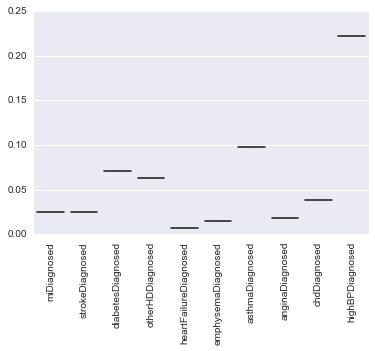

In [12]:
diseaseFreq = {}

for disease in diseaseList:
    diseaseFreq[disease] = np.mean(base_df[disease] == 'Yes')
#print(diseaseFreq)
diseasePlot = sns.boxplot(x = list(diseaseFreq.keys()), y = list(diseaseFreq.values()))
for item in diseasePlot.get_xticklabels():
    item.set_rotation(90)

Now find $p\left(medication\right)$

In [13]:
peopleCount = len(df['id'].unique())

medFreq = df['rxName'].value_counts() / peopleCount
print(medFreq[:10]*100)

AMOXICILLIN     10.231098
AZITHROMYCIN     8.572265
LISINOPRIL       5.614012
SIMVASTATIN      5.038300
IBUPROFEN        4.997642
PREDNISONE       3.517702
HYDROCO/APAP     3.252614
LIPITOR          3.153410
OMEPRAZOLE       3.073721
METFORMIN        3.021679
Name: rxName, dtype: float64


In [14]:
# Now put it all together with Bayes' rule
diseaseMedFreqDict = {}
for disease in diseaseList:
    diseaseMedFreq = (medDiseaseFreqDict[disease]*diseaseFreq[disease])/medFreq
    diseaseMedFreqDict[disease] = diseaseMedFreq
    
    print('Probability of ' + disease + ' for medications:')
    print('Medication     Percent')
    print(100*diseaseMedFreq.sort_values(ascending = False)[:5])
    print('')

Probability of highBPDiagnosed for medications:
Medication     Percent
ZZFEXOFENADINE                   100.0
LANTUS SOLOSTAR PEN INJ 5X3ML    100.0
KP LORATADIN                     100.0
KLORCON                          100.0
KLOR-CON M20 ER                  100.0
Name: rxName, dtype: float64

Probability of diabetesDiagnosed for medications:
Medication     Percent
HUMALOG MIX 75/25 PEN        100.0
AVANDAMET                    100.0
LANTUS OPTICLIK CARTRIDGE    100.0
LANTUS INSULIN               100.0
LANTUS INJ 100U              100.0
Name: rxName, dtype: float64

Probability of chdDiagnosed for medications:
Medication     Percent
KLOR CON                100.0
MICROLET ASCENSIA       100.0
NASACORT AQ NASAL       100.0
NAPROXEN ER             100.0
NALOXONE/PENTAZOCINE    100.0
Name: rxName, dtype: float64

Probability of miDiagnosed for medications:
Medication     Percent
 CLOPIDOGREL                      100.0
EXENATIDE                         100.0
LYICA CAPSULE                  

That is a lot of 100%.  Let's double check - if that were right than everyone taking ZAROXOLYN, for example, will have strokeDiagnosed.

In [15]:
df[df['rxName'] == 'ZAROXOLYN'][['id','strokeDiagnosed']]

,id,strokeDiagnosed
104215,46504101,Yes
147200,82385103,Yes
236193,73891103,Yes


Ok, that checks out, but I am still worried I may have made a mistake.  Of course I could have directly calculated $p\left(disease | medication\right) = \frac{p\left(disease \cap medication \right)}{p\left(medication\right)}$ but I wanted to use Bayes' rule.  Let's check it directly just to be safe.

In [16]:
# Try this directly to compare
diseaseMedFreqDict2 = {}
for disease in diseaseList:
    diseaseMedFreq = df[df[disease] == 'Yes']['rxName'].value_counts() # number of people diagnosed and taking each medication
    diseaseMedFreq = diseaseMedFreq/df['rxName'].value_counts() # Divide by medication frequency
    diseaseMedFreqDict2[disease] = diseaseMedFreq
print('Direct result: ' + str(diseaseMedFreqDict2['highBPDiagnosed']['NUVARING (LATEX-FREE)']))
print('Bayes result:  ' + str(diseaseMedFreqDict['highBPDiagnosed']['NUVARING (LATEX-FREE)']))

Direct result: 0.0740740740741
Bayes result:  0.0740740740741


Checks out!  The result, diseaseMedFreqDict, has the probability of a disease given a medication for all pairings.

## Build a model to infer disease state from medications and demonstrate that the end user should be confident in the result
Let's do some learning!  I am going to keep this as a two class problem by keeping disease state binary for now.<br>
First, filter out the rare medications for robustness and cpu / memory

In [17]:
# First find the top ones after the join with the base data
thresh = 9
topRxSeries = df['rxName'].value_counts()
topRxIndex = topRxSeries[topRxSeries > thresh].index
print('We went from ' + str(topRxSeries.size) + ' to ' + str(topRxIndex.size) + ' unique medications')

We went from 9218 to 2433 unique medications


In [18]:
# then throw out the rows that have medications not on the list
top_meds_df = meds_df[meds_df['rxName'].isin(topRxIndex)]

print('But getting rid of that long tail only goes from ' + 
      str(len(meds_df.index)) + ' to ' + str(len(top_meds_df.index)) + ' medication entries')

But getting rid of that long tail only goes from 242639 to 225318 medication entries


Next, encoding of medications to treat them as features.

In [19]:
# First one-hot encoding
rxName_df = top_meds_df[['rxName','id']]
rxName1h_df = pd.get_dummies(rxName_df, prefix = 'med')

# Then collapse back down
rxName1h_df = rxName1h_df.groupby(['id']).sum().reset_index()

rxName1h_df.head(10)

,id,med_-9,med_1 ANTI-INFECTIVES,med_105 MISCELLANEOUS AGENTS,med_113 GENITOURINARY TRACT AGENTS,med_115 NUTRITIONAL PRODUCTS,med_133 TOPICAL AGENTS,med_20 ANTINEOPLASTICS,med_254 IMMUNOLOGIC AGENTS,"med_30G 0.5"" INSULIN SYRINGE",...,med_ZYLET,med_ZYMAR,med_ZYMAXID,med_ZYPREXA,med_ZYRTEC,"med_ZYRTEC (DYE-FREE,BANANA-GRAPE)",med_ZYRTEC (FILM COATED),med_ZYRTEC (FILM-COATED),med_ZYRTEC ALLGY,med_ZYRTEC-D
0,10007101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10007102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10007103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10007104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10008102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10009101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10012101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10012102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10014102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10016101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Before we asked how many meds 10007101 was taking and got two.  Let's double check!
print(rxName1h_df[rxName1h_df['id'] == 10007101]['med_ATENOLOL'])
print(rxName1h_df[rxName1h_df['id'] == 10007101]['med_AZITHROMYCIN'])
print(rxName1h_df[rxName1h_df['id'] == 10007101]['med_133 TOPICAL AGENTS'])


print('')
print(meds_df[meds_df['id'] == 10007101]['rxName'].isin(topRxIndex))

0    1.0
Name: med_ATENOLOL, dtype: float64
0    1.0
Name: med_AZITHROMYCIN, dtype: float64
0    0.0
Name: med_133 TOPICAL AGENTS, dtype: float64

136261    True
136264    True
Name: rxName, dtype: bool


Cool, still two because neither one was rare!<br>

Now we can rejoin with the base data and make a new dataframe.  Here I the left join assumes that I have complete perscription info and people not on the list are not on medication - inner join might be better if that assumption is bad.

In [21]:
rxName_df = base_df.merge(rxName1h_df, on = 'id', how = 'left')
rxName_df.fillna(0, inplace = True)
rxName_df.head(10)

,id,panel,pooledWeight,age,sex,race,married,highBPDiagnosed,diabetesDiagnosed,chdDiagnosed,...,med_ZYLET,med_ZYMAR,med_ZYMAXID,med_ZYPREXA,med_ZYRTEC,"med_ZYRTEC (DYE-FREE,BANANA-GRAPE)",med_ZYRTEC (FILM COATED),med_ZYRTEC (FILM-COATED),med_ZYRTEC ALLGY,med_ZYRTEC-D
0,10007101,15,3603.881236,28,Male,White,MARRIED,Yes,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10007102,15,2544.550424,25,Female,White,MARRIED,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10007103,15,4050.397468,4,Male,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10007104,15,3064.059720,3,Female,White,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10008101,15,3635.552466,51,Male,Multiple,MARRIED,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10008102,15,4367.816253,53,Female,Asian,MARRIED,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10008103,15,3342.316504,12,Female,Asian,UNDER 16 - INAPPLICABLE,Inapplicable,Inapplicable,Inapplicable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10009101,15,6241.938280,61,Female,Black,NEVER MARRIED,Yes,No,No,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10012101,15,9143.332918,79,Male,White,MARRIED,Yes,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10012102,15,10168.118988,75,Female,White,MARRIED,Yes,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
len(base_df.index)

61489

In [23]:
# Delete the rxName one-hot data frame - it is big and we won't need it
del rxName1h_df

Some actual machine learning now?  Let's do this!

In [24]:
# Making a list of all of the features (rxNames)
feature_names = []
for columnName in list(rxName_df):
    if re.match('^med_', columnName):
        feature_names.append(columnName)

Let's first do one case just to make sure we understand what is going on.

In [25]:
# Select features and class labels
X = rxName_df[feature_names]
y = rxName_df['strokeDiagnosed'] == 'Yes'

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55340 entries, 32476 to 33003
Columns: 2433 entries, med_-9 to med_ZYRTEC-D
dtypes: float64(2433)
memory usage: 1.0 GB


Logistic Regression is fast and interpretable, and often good enough.

In [27]:
logreg = linear_model.LogisticRegression(C=1)
logreg.fit(X_train,y_train)
yhat_test = logreg.predict(X_test)

             precision    recall  f1-score   support

      False       0.98      0.99      0.99      5988
       True       0.39      0.14      0.20       161

avg / total       0.96      0.97      0.97      6149

Accuracy: 97.1702715889


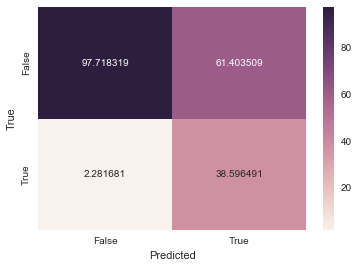

In [28]:
cm = pd.crosstab(y_test, yhat_test, rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())
sns.heatmap(cm, annot = True, fmt='f')

print(metrics.classification_report(y_test,yhat_test))
print('Accuracy: ' + str(100*metrics.accuracy_score(y_test, yhat_test)))

Hmmm, not great.  What if I look at the multi-class case?

/Users/cjemmott/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         DK       0.00      0.00      0.00         3
Inapplicable       0.79      0.38      0.51      1807
         No       0.76      0.95      0.84      4176
    Refused       0.00      0.00      0.00         1
        Yes       0.50      0.12      0.19       161
not ascertained       0.00      0.00      0.00         1

avg / total       0.76      0.76      0.73      6149

Accuracy: 76.0286225403


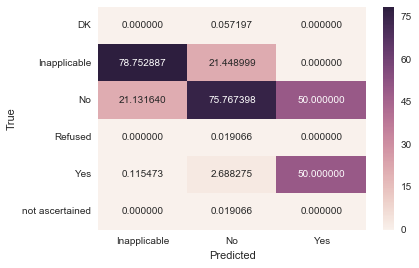

In [29]:
# Select features and class labels
X = rxName_df[feature_names]
y = rxName_df['strokeDiagnosed']# == 'Yes'

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)

logreg = linear_model.LogisticRegression(C=1)
logreg.fit(X_train,y_train)
yhat_test = logreg.predict(X_test)

cm = pd.crosstab(y_test, yhat_test, rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())
sns.heatmap(cm, annot = True, fmt='f')

print(metrics.classification_report(y_test,yhat_test))
print('Accuracy: ' + str(100*metrics.accuracy_score(y_test, yhat_test)))

Still not outstanding.  What about a decision tree?  And let's add age as a feature, since that will help with the "inapplicable" label.

/Users/cjemmott/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         DK       0.00      0.00      0.00         3
Inapplicable       0.99      0.99      0.99      1807
         No       0.96      0.97      0.97      4176
    Refused       0.00      0.00      0.00         1
        Yes       0.22      0.17      0.19       161
not ascertained       0.00      0.00      0.00         1

avg / total       0.95      0.95      0.95      6149



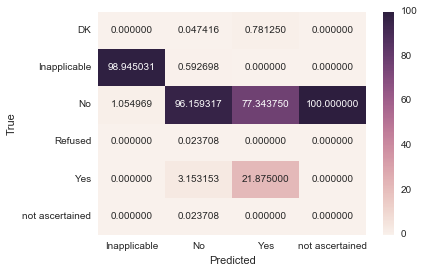

In [30]:
# Select features and class labels
X = rxName_df[feature_names + ['age']]
y = rxName_df['strokeDiagnosed']# == 'Yes'

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
yhat_test = clf.predict(X_test)

cm = pd.crosstab(y_test, yhat_test, rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())
sns.heatmap(cm, annot = True, fmt='f')

print(metrics.classification_report(y_test,yhat_test))

Tree did have much better accuracy, but the F1 score for "Yes" is unchanged.  It looks like the improvement is mostly due to adding age as a feature.  For this task it is leass clear if precision or recall is important, but I do think getting "yes" right is probably best.  So let's stick with the original two-class logistic regression.

In [31]:
for disease in diseaseList:
    X = rxName_df[feature_names]
    y = rxName_df[disease] == 'Yes'

    # Train / test split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 1)

    logreg = linear_model.LogisticRegression(C=1)
    logreg.fit(X_train,y_train)
    yhat_test = logreg.predict(X_test)

    print('Results for: ' + disease)
    print(metrics.classification_report(y_test,yhat_test))
    print('Accuracy: ' + str(100*metrics.accuracy_score(y_test, yhat_test)))
    print('')

Results for: highBPDiagnosed
             precision    recall  f1-score   support

      False       0.91      0.97      0.94      4779
       True       0.85      0.65      0.74      1370

avg / total       0.89      0.90      0.89      6149

Accuracy: 89.7544316149

Results for: diabetesDiagnosed
             precision    recall  f1-score   support

      False       0.98      0.99      0.99      5723
       True       0.89      0.73      0.80       426

avg / total       0.97      0.98      0.97      6149

Accuracy: 97.511790535

Results for: chdDiagnosed
             precision    recall  f1-score   support

      False       0.98      0.99      0.98      5927
       True       0.58      0.35      0.44       222

avg / total       0.96      0.97      0.96      6149

Accuracy: 96.7474386079

Results for: miDiagnosed
             precision    recall  f1-score   support

      False       0.98      0.99      0.99      5996
       True       0.45      0.24      0.31       153

avg / tot

## Classifier Conclusions
Ok, so did the classifier do a good job?  If we use accuracy as a metric, yes.  All of the diseases are classified yes / no with 89%+ accuracy.<br>

On the other hand, only 14% of patients with a stroke were correctly labeled as such (recall), and of those that the classifier predicted had angina, only 38% actually did.  The reason that the accuracy is so high is that some of these diseases are relativly rare, and so it is possibly to get a highly accurate classifier by predicting that nobody has a rare disease.  Clearly this isn't helpful.<br>

The standout classifier is diabetes.  It is 97% accurate, catches 73% of patients with diabetes and has only an 11% false positive rate.

## Overall Conclusions
I think I answered the questions and that this should give you some idea about how I approach problems.  It was pretty rushed, and there are a number of things I would like to do, given time:

- An obvious improvement is to use age as an initial processing stage, and then do other classifying.  I just didn't have time.
- Understand the sources and limitations of the data better.  For example, medication data has time information that I totally threw out.  I didn't use the rx number, and that might be better than the name.
- I would like to learn more about the goal, and specifically what kind of errors are most problematic.
- Documentation is not great.  I treated this more as a chatty lab notebook than a report, again due to time constraints.